In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 

# 06. 高等概率论
本章介绍的主题有：
+ 互补事件(collectively exhaustive events)
+ 贝叶斯理论
+ 基本的预测规则
+ 随机变量

贝叶斯理论和随机变量等高等概率论知识，将引出常见的机器学习算法(如朴素贝叶斯算法)。

## 6.1 互补事件
对于包含两个事件以上的事件集，如果事件集中至少有一个事件发生，我们称这些事件为`互补事件`。比如：
+ 对于事件集$\{温度低于60℃，温度高于 90℃\}$，这些事件不是互补事件，因为温度有可能介于60℃和90℃之间。事实上，这两个事件是`互斥事件`(mutually exhaustive)，因为温度不可能同时低于60℃、高于90℃
+ 掷骰子事件集$\{1,2,3,4,5,6\}$是互补事件，因为这些事件是所有骰子可能出现的点数，骰子点数肯定是其中之一

## 6.2 重温贝叶斯思想
当我们讨论贝叶斯时，我们关注以下3个事情和它们之间的关系：
+ 先验分布(prior distribution)
+ 后验分布(posterior distribution)
+ 似然度(likelihood)

通常来讲，我们更关心后验分布，因为它是我们想知道的答案。 

另一种理解贝叶斯思想的方法是，数据会影响我们的判断。我们有一个先验概率， 或者有一个关于假设朴素的想法，然后根据历史数据，得出该假设的后验概率。

### 6.2.1 贝叶斯定理
`贝叶斯定理`是贝叶斯推理的重要结果。下面我们将介绍它的推导过程。回忆我们之前介绍过的定义：
+ $P(A) = 事件A发生的概率$
+ $P(A|B) = 事件B发生的前提下，事件A发生的概率$
+ $P(A, B) = 事件A和事件B同时发生的概率$
+ $P(A, B) = P(A) \times P(B|A)$

最后一个公式指，事件$A$和事件$B$同时发生的概率，等于事件$A$发生的概率乘以事件$A$发生的前提下事件$B$发生的概率。这个公式就是`贝叶斯定理`的由来。

已知：
+ $P(A,B) = P(A) \times P(B|A)$ 
+ $P(B,A) = P(B) \times P(A|B|)$
+ $P(A,B) = P(B, A)$

因此：
+ $P(B) \times P(A|B) = P(A) \times P(B|A)$

两边同时除以$P(B)$后即得到贝叶斯定理：
+ $P(A|B) = \frac{P(A) \times P(B|A)}{P(B)}$

我们可以这样理解贝叶斯定理：
+ 在只知道$P(A|B)$的情况下，计算$P(B|A)$，反之亦然
+ 在只知道$P(A)$的情况下，计算 P(A|B)

我们还可以从`假设`(hypothesis)和`数据`(data)的角度看待贝叶斯定理。如果$D$表示收集的数据，$H$表示你的初始假设，贝叶斯定理可以被理解为求解$P(H|D)$，即在给定数据$D$的前提下，初始假设成立的概率，用公式表示为：
+ $P(H|D) = \frac{P(D|H)P(H)}{P(D)}$

其中：
+ `P(H)`指在收集数据前，假设发生的概率，称为`先验概率`
+ `P(H|D)`是待求解的概率，指在收集数据后，假设发生的概率，称为`后验概率`
+ `P(D|H)`是给定假设下，数据发生的概率，称为`似然度`
+ `P(D)`指在任何假设下，数据发生的概率，称为`标准化常量`

这一思想已经离机器学习和预测分析不远了。当我们做预测分析时，指的正是根据已有数据预测未来。用术语表示，假设$H$是待预测的结果，$P(H|D)$可以理解为：在给定数据的前提下，假设$H$发生的概率是多少？ 

下面我们通过一个例子演示贝叶斯定理。 假设有`Lucy`和`Avinash`两名员工同时为公司撰写博客。根据历史数据，你对`Lucy` $80\%$的文章非常满意，但只对`Avinash` $50\%$的文章表示满意。某天上午，一篇没有署名的新文章放在你的办公桌前。你非常喜欢这篇文章，给其评价$A+$。假设这两位作者发布文章的频率一致，请问这篇文章来自`Avinash`的概率是多少？ 

在你彻底崩溃之前，让我们先像经验丰富的数学家那样，列出所有的已知信息：
+ 假设`H`：这篇文章的作者是Avinash
+ 数据`D`：你喜欢这篇文章
+ `P(H|D)`：在已知你喜欢文章的前提下，作者是`Avinash`的概率
+ `P(D|H)`：在作者是`Avinash`的前提下，你喜欢该文章的概率
+ `P(H)`：这篇文章作者是`Avinash`的概率
+ `P(D)`：你喜欢这篇文章的概率

请注意，如果缺失上下文，以上某些变量可能没有任何意义。比如`P(D)`，它可以是你喜欢每一篇出现在办公桌上的文章。这听起来非常诡异，但在贝叶斯定理 中，它是有意义的。同样地，`P(D)`并不依赖文章的来源，而是指对于任何来源的文章，你喜欢的概率(再说一次，如果不考虑上下文，这听起来会非常诡异)。 

我们用贝叶斯定理计算$P(H|D)$：
+ $P(H|D) = \frac{P(D|H)P(H)}{P(D)}$

其中：
+ `P(H)`是该文章来自Avinash的概率，由于两位作者发布博客的频率相等，我们可以认为该文章有一半的概率来自 Avinash
+ `P(D|H)`是你喜欢Avinash文章的比例，我们已知是$50\%$
+ `P(D)`比较有意思。它指通常情况下，你喜欢一篇文章的概率。这意味着我们需要考虑文章来自Lucy等其他作者的情况。如果所有的假设能够组成一个`套件` (suite)，我们就可以使用上一章介绍的概率法则。我们将由完全互斥且互不相交的假设组成的集合称为`套件`。简单来说，对于套件中的假设，有且仅有一个假设发生。在本例中，两个假设分别是*文章来自Lucy*和*文章来自Avinash*。 显然，这两个假设可以构成套件

当我们有了套件，就可以使用乘法和加法法则，如下所示
+ $D = (文章来自Avinash 且 你喜欢它) 或 (文章来自Lucy 且 你喜欢它)$
+ $P(D) = P(你喜欢它且文章来自Avinash) 或 P(你喜欢它且文章来自Lucy)$
+ $P(D) = P(文章来自Avinash) \times P(你喜欢它 | 文章来自Avinash) + P(文章来自Lucy) \times P(你喜欢它 | 文章来自Lucy)$
+ $P(D) = 0.5 \times (0.5) + 0.5 \times (0.8) = 0.65$

下面可以完成我们的等式：
+ $P(H|D) = \frac{0.5 \times 0.5}{0.65} = 0.38$

因此，这篇文章来自Avinash的概率是0.38。$P(H)=0.5$和$P(H|D)=0.38$有点意思。$P(H)=0.5$指在没有任何数据的前提下，文章来自Avinash的概率是$50\%$。如果给定了数据(你是否喜欢该博客)，假设发生的概率发生了变化，低于$0.5$。**这正是贝叶斯思想的本质：根据先验假设和给定的新数据，更新对事件的后验假设概率**。

### 6.2.2 贝叶斯定理的更多应用
通常情况下，当我们需要依据数据和概率快速做出决策时，贝叶斯定理就能派上用 场。

大部分推荐引擎，比如`Netflix`，都或多或少地使用了贝叶斯定理。我们很容易就能想通其中的道理。假设Netflix只有10种类型影片可供选择。如果没有任何用户数据，用户喜欢喜剧类型影片的概率是$\frac{1}{10}$。当用户给喜剧电影5星评价后(满分5星)，请问Netflix猜测用户喜欢另一部喜剧电影的概率是多少？显然这个概率将比随机猜测概率$10\%$高。

##### 案例：泰坦尼克
根据1912年沉没的泰坦尼克号数据，我们使用概率论方法，研究乘客生还情况是否具有人口统计学特征。换句话说，我们想从数据集中抽离出核心特征，寻找哪种类型的乘客将在此次灾难中生还。

泰坦尼克号数据如下：

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic = titanic[['Sex', 'Survived']] 
titanic.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


我们先从简单的概率入手。首先计算在不考虑性别的情况下，每名乘客的生还概率。方法是计算`Survived`列值为`yes`的行数，再除以总行数：

In [3]:
num_rows = float(titanic.shape[0])
p_survived = (titanic.Survived == 1).sum() / num_rows
p_notsurvived = 1 - p_survived
p_survived

0.3838383838383838

我们分别计算男性和女性的生还率：

In [4]:
p_male = (titanic.Sex=="male").sum() / num_rows
p_female = 1 - p_male
p_male

0.6475869809203143

现在回答一个问题：性别是否是影响生还率的重要特征？为了回答这个问题， 我们需要计算$P(Survived|Female)$，即已知乘客为女性的情况下的生还率。为此，我们将生还的女性乘客数量除以女性乘客总数，公式如下：
+ $P(生还 | 女性) = \frac{P(女性 且 生还)}{P(女性)}$

In [5]:
number_of_women = titanic[titanic.Sex=='female'].shape[0] 
women_who_lived = titanic[(titanic.Sex=='female') & (titanic. Survived==1)].shape[0]
p_survived_given_woman = women_who_lived / float(number_of_women) 
p_survived_given_woman

0.7420382165605095

##### 案例：医疗案例
贝叶斯定理的经典用途之一是医学实验分析。现在对违禁药物的检查已经越来越普遍。检测公司认为自己的检查方法非常灵敏，(基本上)只要使用了违禁药物，检测结果都会呈阳性。同时，他们声称检测也具有较高特异性，如果未使用违禁药物，检测结果将呈阴性。

假设平均来看，药物检测的敏感性为$60\%$，特异性为$99\%$。也就是说，如果雇员使用了违禁药物，检测结果有$60\%$的概率呈阳性；如果雇员未使用违禁药物，检测结果有$99\%$的概率呈阴性。

假设我们在违禁药物使用率为$5\%$的工作场所进行检测，我们想知道如果检测结果是阳性，那么雇员使用违禁药物的概率是多少？

按照贝叶斯定理，我们需要计算使用了违禁药物且检测结果为阳性的概率：
+ 用`D`表示使用了违禁药物
+ 用`E`表示检测结果为阳性
+ 用`N`表示未使用违禁药物
+ 待求解的对象是$P(D|E)$

根据贝叶斯定理：
+ $P(D|E) = \frac{P(E|D)P(D)}{P(E)}$

先验概率$P(D)$是在检测之前，雇员使用违禁药物的概率$5\%$。似然度$P(E|D)$是使用了违禁药品且检测结果为阳性的概率，即检测的敏感性$60\%$。常数$P(E)$则比较特殊。我们需要考虑两种可能性：$P(E 且 D)$和$P(E 且 N)$，即还要考虑到雇员未使用违禁药物，但检测结果为阳性的错误检测情况：
+ $P(E) = P(E且D) + P(E且N) = P(D)P(E|D) + P(N)P(E|N) = 0.05×0.6+0.95×0.01 = 0.0395$

那么：
+ $P(D|E) = \frac{0.6 \times 0.05}{0.0395} = 0.76$

## 6.3 随机变量
在之前的案例中，我们认为变量(在数学和程序语言中)是固定值。在数学中，我们可以用$h$表示直角三角形的斜边长。在Python中用$x$表示5($x = 5$)。以上两个变量每次只能是唯一值。

和变量一样，随机变量也用来存储值，两者最大的区别在于随机变量的取值具有不确定性，完全取决于所处的环境。

如果随机变量有多个取值，那我们如何追踪每个值呢？答案是随机变量的每个值都对应一个百分比。也就是说，对于随机变量可能出现的每一个值，都有唯一一个与之对应的概率。 

我们可以计算出随机变量的概率分布，观察随机变量可能的取值和概率。我们通常用大写字母(例如$X$)表示随机变量，比如：
+ $X = 掷骰子的结果$
+ $Y = 某公司今年的销售额$
+ $Z = 应聘者的编程测验得分$

事实上，随机变量是将`样本空间`(包含了所有可能的结果)中的值映射到概率(`0～ 1`)的函数，用公式表达如下：
+ $f(事件) = 概率$

随机变量主要有两种类型：
+ 离散型(discrete)
+ 连续型(continuous)

### 6.3.1 离散型随机变量
离散型随机变量的取值范围是有限的，如`表6.2`所示：
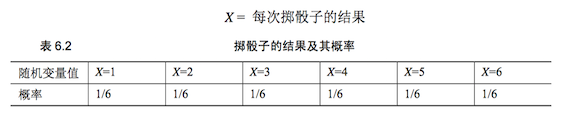

随机变量有很多属性，比如`期望`(expected value)和`方差`(variance)。我们通常用`概率质量函数`(probability mass function，PMF)描述离散随机变量的分布情况，表示方式如下：
+ $P(X = x) = PMF$

对于掷骰子事件：
+ $P(X = 1) = \frac{1}{6}, P(X = 5) = \frac{1}{6}$

随机变量的期望是指大量随机变量样本的平均值，有时也被称为变量的平均值。下面用Python代码模拟掷骰子事件：

In [6]:
def random_variable_of_dice_roll():
    return random.randint(1, 6)

trials = [] 
num_trials = 100 

for trial in range(num_trials):
    trials.append(random_variable_of_dice_roll()) 
    
sum(trials)/float(num_trials)

3.32

增大投掷骰子的次数：

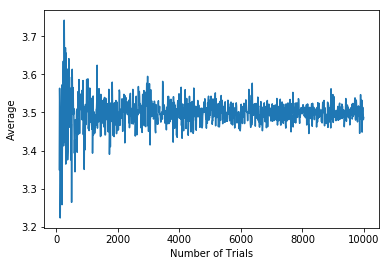

In [7]:
num_trials = range(100,10000, 10) 
avgs = [] 

for num_trial in num_trials:
    trials = []
    for trial in range(1, num_trial):
        trials.append( random_variable_of_dice_roll() )
    avgs.append(sum(trials)/float(num_trial)) 

plt.plot(num_trials, avgs) 
plt.xlabel('Number of Trials') 
plt.ylabel("Average") 
plt.show()

上图是掷骰子的次数和平均值之间的关系。图中左侧显示，如果掷骰子的次数只有100次，那么很难保证平均值接近3.5。然而，如果连续掷10000次骰子，平均值明显越来越接近3.5。

离散型随机变量的期望公式：
+ $期望 = E[X] = \mu_{X} = \sum {x_i} p_i$

其中，$x_i$是第$i$次的结果，$p_i$是第$i$次的概率。

对于掷骰子事件，我们可以计算其期望为：
+ $\frac{1}{6}(1) + \frac{1}{6}(2) + \frac{1}{6}(3) + \frac{1}{6}(4) + \frac{1}{6}(5) + \frac{1}{6}(6) = 3.5$

随机变量的期望并不能描述随机变量所有的特征，因此我们需要引入方差的概念。

`方差`用来描述随机变量的离散程度，它量化了变量值的不确定性。离散型随机变量的方差公式如下：
+ $方差 = V [X] = \sigma_{X}^2 = \sum ( x_i − μ_{X})^2p_i$

其中，$x_i$和$p_i$与之前的含义相同，$μ_{X}$是随机变量的期望。$\sigma$是随机变量的标准差，等于方差的平方根。

下面我们介绍更复杂的离散型随机变量案例。假设你的团队用`李克特度量法`评估新产品是否会成功，其中用0表示彻底失败，4表示获得巨大成功。你们根据新产品的用户测试结果和历史产品表现预测新产品的成功概率。

首先，我们需要定义随机变量。假设随机变量$X$表示产品成功情况，$X$的值只有5种可能：0、1、2、3 或 4，所以$X$是离散型随机变量。`表6.3`是$X$的概率分布:
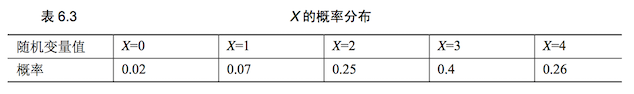

该产品有$2\%$的概率彻底失败，$26\%$的概率获得巨大成功！我们可计算$X$的期望： 
+ $E[X] = 0 \times (0.02) + 1 \times (0.07) + 2 \times (0.25) + 3 \times (0.4) + 4 \times (0.26) = 2.81$

因此，管理层可以认为该产品成功的期望值是2.81。但是，仅有这个数字还不足以下结论。当我们有多个项目备选时，期望可能是较好的对比指标。然而，当我们仅有一个项目时，我们需要更多的衡量指标。

我们计算$X$的方差：
+ $V[X] = (0−2.81)^2 \times 0.02 + (1−2.81)^2 \times 0.07 + (2−2.81)^2 \times 0.25+ (3−2.81)^2 \times 0.4 + (4−2.81)^2 \times 0.26=0.93$

由此可知标准差等于$0.97$。

因此，我们可以认为新产品获得成功的期望是$2.81 \pm 0.97$，即`1.84～3.78`。

你可能在想，这个新产品最好的得分是$3.78$，最差的得分是$1.84$。然而并不是这样！新产品既可能是$4$分，也可能低于$1.8$分。为了证明这一点，我们计算$P(X\ge 3)$。

$P(X\ge 3)$指随机变量值大于或等于$3$的概率。换句话说，新产品的得分大于或等于$3$的概率是多少？计算如下：
+ $P(X\ge 3) = P(X = 3) + P(X = 4) = 0.66 = 66\%$

#### 6.3.1.1 离散型随机变量的类型
了解不同类型的离散型随机变量，可以让我们更好地理解如何在实际案例中使用它。以下特殊的随机变量针对不同的场景，可以实现用非常简单的方式进行建模。

##### 二项随机变量
`二项随机变量`指重复观察某一试验，并统计试验结果为`true`的次数。 在学习二项随机变量之前，我们需要知道什么是`二项分布`。

`二项分布`需要满足以下4个条件：
+ 试验结果只有两种：成功或失败
+ 试验结果是独立的，互不影响的
+ 试验次数是固定的(固定样本大小)
+ 每次试验成功的概率均为$p$

二项随机变量是离散型随机变量。我们一般用$X$表示二项分布试验成功的次数，参数$n$表示试验的次数，$p$表示每次试验成功的概率。 二项随机变量的`概率质量函数`(PMF)如下：
+ $P(X = k) = \frac{n!}{(n-k)!k!} P^k(1-P)^{n-k}$

**案例：餐馆生存概率**  
已知某城市餐馆开业首年的生存率是$20\%$。假设今年有14家餐馆开业，请问1年后有4家餐馆生存下来的概率是多少？ 

首先，我们需要验证这是一个二项分布试验：
+ 试验结果是餐馆继续营业或关门
+ 试验结果是独立的，互不影响(假设各餐馆之间不影响对方的生存概率) 
+ 试验次数是固定的，14 家餐馆开业
+ 每次试验成功的概率都为$p$，即生存率是$20\%$

我们已经知道两个参数$n=14$，$p=0.2$，下面将参数填进公式：
+ $P(X = 4) = \frac{14!}{(14-4)!4!} 0.2^4 \times 0.8^{10} = 0.17$

1年之后有4家餐馆继续营业的概率是$17\%$。

**案例：血型**  
假设某对夫妻孩子血型为`O`的概率是$25\%$。那么，他们的5个孩子中3个血型为O的概率是多少？

我们用$X$表示孩子血型为`O`，其中$n=5，p=0.25$，那么：
+ $P(X = 3) = \frac{5!}{(5-3)!3!} \times 0.25^3 \times 0.75^2 = 0.087$

我们还可以计算随机变量值为0、1、2、3、4和5 时对应的概率，了解它的概率分布:
+ $P(X = 0) = 0.23730$
+ $P(X = 1) = 0.39551$
+ $P(X = 2) = 0.26367$
+ $P(X = 3) = 0.08789$
+ $P(X = 4) = 0.01465$
+ $P(X = 5) = 0.00098$

有了以上概率分布，我们就可以计算变量的期望和方差：
+ $期望 = E[X] = \mu_{X} = \sum {x_i} p_i = 1.25$
+ $方差 = V [X] = \sigma_{X}^2 = \sum ( x_i − μ_{X})^2p_i = 0.9375$

因此，我们预计该家庭有1～2个孩子的血型为`O`型。 

如果我们想知道至少有3个孩子血型为`O`型的概率是多少，我们可以使用以下公式：
+ $P( X \ge 3) = P( X = 5) + P( X = 4) + P( X = 3) = 0.00098 + 0.01465 + 0.08789 = 0.103$

二项随机变量有特殊的计算期望和方差的方法。如果$X$是二项随机变量，那么：
+ $E[X] = np$
+ $V[X] = np(1−p)$

对于上面的例子，我们可以使用以下公式计算期望和方差：
+ $E[X] = 0.25 \times 5 = 1.25$
+ $V[X] = 1.25 \times 0.75 = 0.9375$

二项随机变量是计算二项分布试验成功次数的离散型随机变量。它在数据驱动的实验中具有重要作用，比如在给定转化率的前提下预测注册人数，或者预测股票价格下跌的幅度(我们随后会用更强大的模型预测股票价格的变化)。

##### 几何随机变量
`几何随机变量`(geometric random variables)和`二项随机变量`非常类似，适用的对象同样是重复发生的事件。两者的区别在于`几何随机变量`不再限制样本的大小。比如，对于之前的`血型`案例，我们不再限定只有5个孩子。相反，我们对试验的次数进行建模，计算第1次试验成功的概率。

一般情况下，几何分布的事件或试验需要满足以下4个条件：
+ 试验结果只有两种：成功或失败
+ 试验结果是独立的，互不影响的
+ 试验次数不固定
+ 每次试验成功的概率均为$p$

几何随机变量属于离散型随机变量，它用于计算试验第一次成功的概率。参数$p$表示每次试验成功的概率，$(1−p)$是每次试验失败的概率。

几何随机变量的案例有：
+ 计算创业公司在得到第一笔风险投资前，需要和VC会面的次数
+ 计算掷硬币时得到第1个正面朝上的投掷次数

几何随机变量的`概率质量函数`(PMF)如下：
+ $P(X = x) =  (1−p) ^{x−1}p$

**案例：天气**  
假设4月每一天降雨的概率都是$34\%$。请问4月4号之前下雨的概率是多少？ 根据已知条件，事件$X$是第1次降雨发生的日期，概率$p$等于$0.34$，$(1−p)$等于$0.66$。因此，4月4号之前下雨的概率等于：
+ $P(X \le 4) = P(1) + P(2) + P(3) + P(4) = 0.34 + 0.34*(1-0.34) + 0.34*(1-0.34)^2 + 0.34*(1-0.34)^3 = 0.8$

即$80\%$。

> 几何型随机变量同样有特殊的计算期望和方差的方法。如果$X$是几何型随机变量，那么：
> + $E[X] = \frac{1}{p}$
> + $V[X] = \frac{(1−p)}{p^2}$

##### 泊松随机变量
`泊松随机变量`(poisson random variable)用于计算事件在特定时间段内发生的次数。假设根据历史数据，在某特定期间内，事件$X$的平均发生次数是$\mu$，那么泊松随机变量记为$X=Poi(\mu)$。 

泊松分布是离散型概率分布，以下是两个泊松随机变量案例： 
+ 根据网站历史表现，预测在1小时内网站访问者数量达到特定值的概率
+ 根据历史交通报告，预测某十字路口的车祸数量

如果用$X$表示指定期间事件发生的次数，用$\lambda$表示给定期间内事件的平均发生次数，那么在给定期间内，事件发生$x$次的概率可以用以下公式表示：
+ $P(X = x) = \frac{e^{-\lambda}\lambda^{x}}{x!}$

**案例：呼叫中心**  
已知呼叫中心接到的电话数量服从泊松分布，平均每小时5个电话。请问：在晚上10点～11点接到6个电话的概率是多少？

所有已知的信息包括，随机变量$X$指晚上10 点～11点接到电话的数量，$\lambda$等于5。请注意，平均值5不是凭空瞎猜的，而是来自对过去这个时间段电话数量的分析。我们需要通过各种方法对平均值进行估计，以便生成泊松随机变量进行预测。

求解$x=6$的概率：
+ $P(X = 6) = \frac{e^{-5}5^{6}}{6!} = 0.146$

> 泊松随机变量同样有特殊的计算期望和方差的方法。如果$X$是泊松随机变量，那么：
> + $E[X]=\lambda$
> + $V[X]=\lambda$

### 6.3.2 连续型随机变量
和`离散型随机变量`不同，`连续型随机变量`的取值是无限的。我们用`密度曲线`(density curve)，而不是`概率质量函数` (PMF)描述变量的特征。

以下是两个连续型随机变量案例：
+ 某个销售代表的电话通话时长(不是电话数量)
+ 容量为20加仑石油油桶的真实含量(不是油桶的容量)

假定$X$是连续型随机变量，那么存在函数$f(x)$，使得对于任意常量$a$和$b$存在：
+ $P ( a \le X \le b) = \int_{a}^{b}f(x)dx$

其中$f(x)$是`概率密度函数`(probability density function，PDF)。`PDF`是`连续型随机变量`版本的`PMF`。

`标准正态分布`(standard normal distribution)是最重要的连续型随机变量分布，它的概率密度函数是：
+ $\begin{equation} f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}} \end{equation}$

其中$\mu$是变量的均值，$\sigma$是标准差。

我们用Python绘制平均值为0、标准差为1的标准正态分布图：

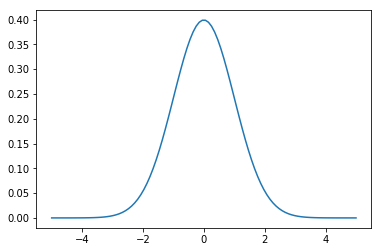

In [8]:
def normal_pdf(x, mu = 0, sigma = 1):
    return (1./np.sqrt(2*3.14 * sigma**2)) * 2.718**(-(x-mu)**2 / (2. * sigma**2))

x_values = np.linspace(-5,5,100) 
y_values = [normal_pdf(x) for x in x_values] 
plt.plot(x_values, y_values)

我们得到了最常见的钟形曲线，该图形围绕$x=0$完全对称。下面尝试调整一些参数：

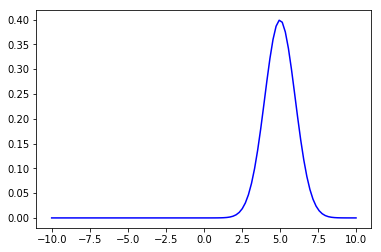

In [9]:
# 𝜇 = 5
x_values = np.linspace(-10, 10, 100)
y_values = [normal_pdf(x, mu = 5) for x in x_values]
plt.plot(x_values, y_values, c='b')
plt.show()

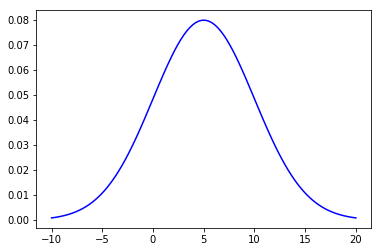

In [10]:
# 𝜇 = 5, σ = 5
x_values = np.linspace(-10, 20, 100)
y_values = [normal_pdf(x, mu = 5, sigma = 5) for x in x_values]
plt.plot(x_values, y_values, c='b')
plt.show()

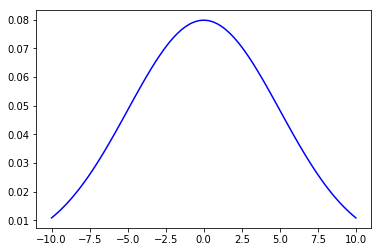

In [11]:
# σ = 5
x_values = np.linspace(-10, 10, 100)
y_values = [normal_pdf(x, sigma = 5) for x in x_values]
plt.plot(x_values, y_values, c='b')
plt.show()

在以上实验中，我们首先得到了最熟悉的钟形图，然后通过改变参数，图形逐渐变得更瘦、更厚、左右移动。

## 6.4 总结
概率论是解释随机、混乱的各种现实事件的一门学科。通过基本的概率法则，我们可以对各种随机事件进行建模。我们可以用随机变量表示多个不同的值，使用概率质量/密度函数对多条产品线进行对比，并分析实验结果。

我们通过案例介绍了如何利用概率法则对复杂事件进行预测。随机变量和贝叶斯定理是概率论中应用很多的方法。在随后的章节，我们还将利用贝叶斯定理创造更加强大和快速的机器学习算法—朴素贝叶斯算法，该算法充分利用了贝叶斯思想的强大能力，解决预测学习类的问题。

在接下来的两章中，我们将重点介绍统计学。和概率论类似，统计学也是用数学理论对现实世界建模的一门学科。两者最大的区别在于对不同类型的现实事件建模，并使用不同的术语。我们还会尝试通过孤立样本对总体特征进行建模。

概率论和统计学是数学重要的两个分支，两者有千丝万缕的联系。